In [16]:
import csv
import matplotlib.pyplot as plt
import statistics
import scipy.stats as sp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np

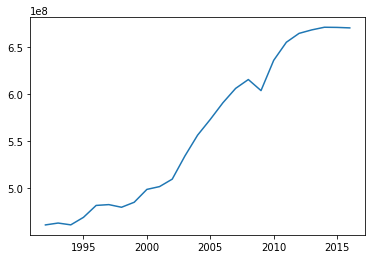

In [5]:
# co2 emissions
country_count = {}
emission_count = {}
years = []
normalized_emissions = []

with open("data/annual-co2-emissions-per-country.csv") as co2:
    reader = csv.reader(co2)
    next(reader)
    for line in reader:
        if int(line[2]) not in country_count:
            country_count[int(line[2])] = 0
            emission_count[int(line[2])] = 0
        country_count[int(line[2])] += 1
        emission_count[int(line[2])] += int(line[3])
        
sorted_dict = {k: v for k, v in sorted(list(emission_count.items()))}
        
for year in sorted_dict:
    if year > 1991 and year < 2017:
        years.append(year)
        normalized_emissions.append(sorted_dict[year] / country_count[year])
        #normalized_emissions.append(sorted_dict[year])

plt.plot(years, normalized_emissions)
plt.show()

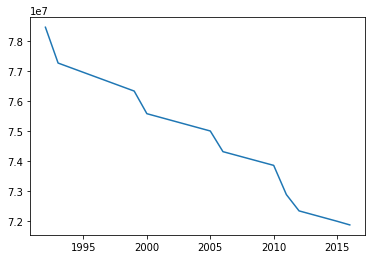

In [6]:
# forest area
country_count = {}
forest_count = {}
years = []
normalized_forest = []

with open("data/forest-area-km.csv") as forest:
    reader = csv.reader(forest)
    next(reader)
    for line in reader:
        if int(line[2]) not in country_count:
            country_count[int(line[2])] = 0
            forest_count[int(line[2])] = 0
        country_count[int(line[2])] += 1
        forest_count[int(line[2])] += float(line[3])
        
sorted_dict = {k: v for k, v in sorted(list(forest_count.items()))}
        
for year in sorted_dict:
    if year > 1991 and year < 2017:
        years.append(year)
        normalized_forest.append(sorted_dict[year] / country_count[year])
        #normalized_forest.append(sorted_dict[year])

plt.plot(years, normalized_forest)
plt.show()

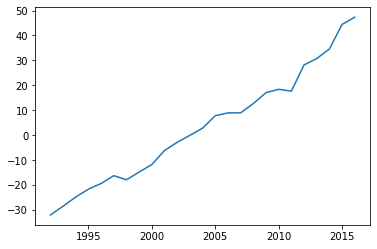

In [7]:
# sea level
data_by_year = {}
years = []
mean_sea = []

with open("data/global_sea_level.tsv") as sea:
    reader = csv.reader(sea, delimiter= "\t")
    next(reader)
    for line in reader:
        year = int(line[0].split(".")[0])
        if year not in data_by_year:
            data_by_year[year] = []
        data_by_year[year].append(float(line[1]))
        
sorted_dict = {k: v for k, v in sorted(list(data_by_year.items()))}
for year in sorted_dict:
    if year > 1991 and year < 2017:
        years.append(year)
        mean_sea.append(statistics.mean(sorted_dict[year]))
    
plt.plot(years, mean_sea)
plt.show()

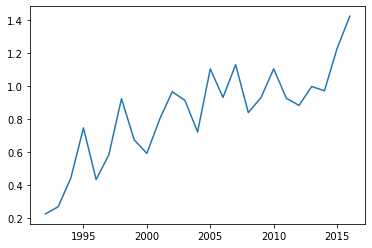

In [8]:
# global temp
data_by_year = {}
years = []
mean_temp = []

with open("data/global_temp_monthly_avg.tsv") as temp:
    reader = csv.reader(temp, delimiter= " ")
    next(reader)
    next(reader)
    next(reader)
    for line in reader:
        stripped = [elem for elem in line if elem.strip()]
        year = int(stripped[0])
        if year not in data_by_year:
            data_by_year[year] = []
        data_by_year[year].append(float(stripped[2]))
        
sorted_dict = {k: v for k, v in sorted(list(data_by_year.items()))}
for year in sorted_dict:
    if year > 1991 and year < 2017:
        years.append(year)
        mean_temp.append(statistics.mean(sorted_dict[year]))
    
plt.plot(years, mean_temp)
plt.show()

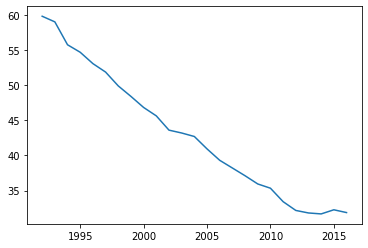

In [9]:
# biodiversity
years = []
biodiversity = []

with open("data/global-living-planet-index.csv") as bio:
    reader = csv.reader(bio)
    next(reader)
    for line in reader:
        if line[0] == "World":
            if int(line[2]) > 1991:
                years.append(int(line[2]))
                biodiversity.append(float(line[3]))
            
plt.plot(years, biodiversity)
plt.show()

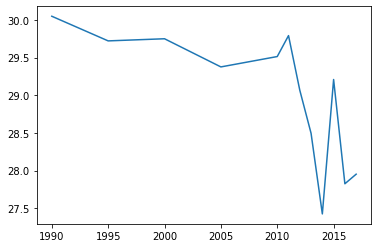

In [10]:
# air pollution

year_data = {}
pollution_data = []
years = []

with open("data/PM25-air-pollution.csv") as airpol:
    reader = csv.reader(airpol)
    next(reader)
    for line in reader:
        year = int(line[2])
        if year not in year_data:
            year_data[year] = []
        year_data[year].append(float(line[3]))
        
for year in year_data:
    years.append(year)
    pollution_data.append(statistics.mean(year_data[year]))

plt.plot(years, pollution_data)
plt.show()

In [11]:
data_types = [normalized_emissions, normalized_forest, mean_sea, mean_temp, biodiversity]
labels = ["emissions", "forest", "sea_level", "temp", "biodiversity"]

for index, data in enumerate(data_types):
    for index2, data2 in enumerate(data_types):
        if index2 > index:
            print(labels[index], labels[index2])
            print(sp.pearsonr(data, data2))
            print(sm.tsa.stattools.ccf(data, data2, adjusted=False))

emissions forest
(-0.97022007322255, 1.1626561115247588e-15)
[-0.97022007 -0.87494319 -0.77333971 -0.65994499 -0.54438206 -0.42917586
 -0.31942941 -0.22307971 -0.12124697 -0.02677313  0.06806284  0.17031605
  0.24264553  0.30082501  0.34883736  0.38407154  0.40623454  0.41457687
  0.42376457  0.40355263  0.36304103  0.30986709  0.24926497  0.18111535
  0.10828082]
emissions sea_level
(0.9669128731773955, 3.840396693800187e-15)
[ 0.96691287  0.85407888  0.73645686  0.6252338   0.5162474   0.41408172
  0.32726448  0.22408597  0.11742533  0.02346487 -0.07120211 -0.17104358
 -0.25982175 -0.32323756 -0.37155832 -0.40282961 -0.41732453 -0.41387758
 -0.41757738 -0.39034749 -0.35297849 -0.30063235 -0.2398287  -0.16876808
 -0.08854377]
emissions temp
(0.7654890886737187, 8.254223451658738e-06)
[ 0.76548909  0.67683093  0.59633171  0.55120733  0.49496577  0.49691974
  0.44699017  0.33843746  0.27494677  0.23119161  0.09361166 -0.02324286
 -0.13770408 -0.17151864 -0.25945855 -0.32674949 -0.351526

[[4.61442033e+08 4.63418935e+08]
 [4.61508238e+08 4.69453513e+08]
 [4.82071297e+08 4.82930253e+08]
 [4.80127105e+08 4.85410132e+08]
 [4.99026210e+08 5.02004339e+08]
 [5.09892172e+08 5.34418914e+08]
 [5.56437097e+08 5.73094633e+08]
 [5.90784213e+08 6.05941421e+08]
 [6.15303217e+08 6.03589388e+08]
 [6.35608034e+08 6.54767594e+08]
 [6.64147985e+08 6.67824814e+08]
 [6.70638089e+08 6.70464553e+08]
 [6.69950120e+08 7.84706507e+07]
 [7.72753106e+07 7.71194689e+07]
 [7.69636271e+07 7.68077854e+07]
 [7.66519436e+07 7.64961018e+07]
 [7.63402601e+07 7.55851502e+07]
 [7.54695639e+07 7.53539777e+07]
 [7.52383915e+07 7.51228052e+07]
 [7.50072189e+07 7.43174175e+07]
 [7.42029158e+07 7.40884142e+07]
 [7.39739125e+07 7.38594108e+07]
 [7.28849144e+07 7.23403769e+07]
 [7.22248737e+07 7.21093704e+07]
 [7.19938673e+07 7.18719748e+07]]
[0.22541666666666665, 0.2685, 0.44183333333333336, 0.7463333333333334, 0.4335, 0.583, 0.9234166666666667, 0.6739166666666667, 0.592, 0.7974166666666667, 0.9656666666666667, 0

ValueError: x and y must be the same size

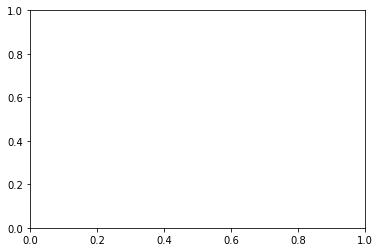

In [44]:
model = LinearRegression()
X = np.array([data_types[0],data_types[1]]).reshape(-1,2)
print(X)
print(Y)
Y = data_types[3]
model.fit(X, Y)
print("Fitted equation: y =",model.coef_,"x +",model.intercept_)
plt.scatter(X, Y, color='g')
plt.plot(X, model.predict(X),color='g')